In [47]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [48]:
data = pd.read_csv("creditcard.csv", thousands = ",")

In [49]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [50]:
dataset = data

In [51]:
def tsne_plot(X, y):
    tsne = TSNE(n_components=2)
    X_transformed = tsne.fit_transform(X)
    plt.figure(figsize=(12, 8))
    plt.scatter(
        X_transformed[np.where(y == 0), 0],
        X_transformed[np.where(y == 0), 1],
        marker='o',
        color='g',
        linewidth=1,
        alpha=0.8
    )
    plt.scatter(
        X_transformed[np.where(y == 1), 0],
        X_transformed[np.where(y == 1), 1],
        marker='o',
        color='r',
        linewidth=1,
        alpha=0.8
    )
    plt.show()

## С разделениям на часы

In [52]:
dataset_hour = dataset
dataset_hour['Time'] = dataset["Time"].apply(lambda x : x / 3600 % 24)

/var/folders/jq/1l3r6pcn17lglysrw1rgw3yc0000gn/T/ipykernel_33958/1955657344.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_subsample = anomaly_entries.append(regular_sample)
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


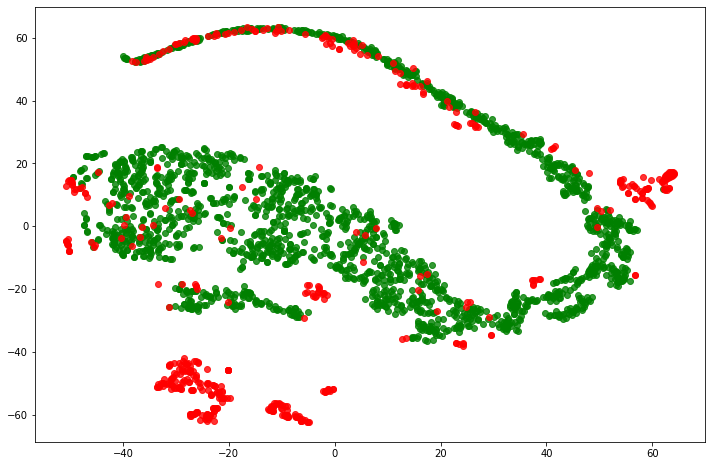

In [53]:
anomaly_entries = dataset_hour[dataset_hour['Class'] == 1]
regular_entries = dataset_hour[dataset_hour['Class'] == 0]
subsample_size = 2000
regular_sample = regular_entries.sample(n=subsample_size)
dataset_subsample = anomaly_entries.append(regular_sample)
X_subsample = dataset_subsample.drop(columns=['Class']).values
y_subsample = dataset_subsample['Class'].values
tsne_plot(X_subsample, y_subsample)

In [54]:
X = regular_entries.drop(columns="Class")

In [65]:
from tensorflow.keras import layers, losses, metrics, optimizers, regularizers
from tensorflow.keras.models import Model
input_layer = layers.Input(shape=(X.shape[1],))
encoded = layers.Dense(100, activation='tanh')(input_layer)
encoded = layers.Dense(50, activation='relu')(encoded)
encoded = layers.Dense(35, activation='relu')(encoded)
decoded = layers.Dense(50, activation='tanh')(encoded)
decoded = layers.Dense(100, activation='tanh')(decoded)
output_layer = layers.Dense(X.shape[1], activation='relu')(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(
    optimizer='adadelta', loss='mse', metrics=['accuracy']
)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_11 (Dense)            (None, 100)               3100      
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 35)                1785      
                                                                 
 dense_14 (Dense)            (None, 50)                1800      
                                                                 
 dense_15 (Dense)            (None, 100)               5100      
                                                                 
 dense_16 (Dense)            (None, 30)                3030

In [66]:
autoencoder.fit(X, X,
                batch_size = 256, epochs = 10,
                shuffle = True, validation_split = 0.20)
 
 

Epoch 1/10
889/889 [==============================] - 3s 3ms/step - loss: 2369.3325 - accuracy: 0.3225 - val_loss: 2268.3975 - val_accuracy: 0.6070
Epoch 2/10
889/889 [==============================] - 2s 3ms/step - loss: 2353.4502 - accuracy: 0.6391 - val_loss: 2242.8750 - val_accuracy: 0.4834
Epoch 3/10
889/889 [==============================] - 2s 2ms/step - loss: 2327.9443 - accuracy: 0.6340 - val_loss: 2227.8845 - val_accuracy: 0.4834
Epoch 4/10
889/889 [==============================] - 2s 3ms/step - loss: 2314.3933 - accuracy: 0.6340 - val_loss: 2217.4172 - val_accuracy: 0.4834
Epoch 5/10
889/889 [==============================] - 2s 3ms/step - loss: 2304.2271 - accuracy: 0.6341 - val_loss: 2208.9692 - val_accuracy: 0.4835
Epoch 6/10
889/889 [==============================] - 3s 3ms/step - loss: 2295.8906 - accuracy: 0.6347 - val_loss: 2201.9402 - val_accuracy: 0.4888
Epoch 7/10
889/889 [==============================] - 3s 3ms/step - loss: 2288.9570 - accuracy: 0.6547 - val_los

In [67]:
y_all = dataset_hour['Class']
X_all = dataset_hour.drop(columns = 'Class')


In [68]:
from tensorflow.keras.models import Sequential
autoencoder_encode = Sequential()
autoencoder_encode.add(autoencoder.layers[0])
autoencoder_encode.add(autoencoder.layers[1])
autoencoder_encode.add(autoencoder.layers[2])
X_encoded = autoencoder_encode.predict(X_all)


In [69]:
df = pd.DataFrame(X_encoded)

In [70]:
df['Class'] = y_all

/var/folders/jq/1l3r6pcn17lglysrw1rgw3yc0000gn/T/ipykernel_33958/1149759380.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_subsample = anomaly_entries.append(regular_sample)
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


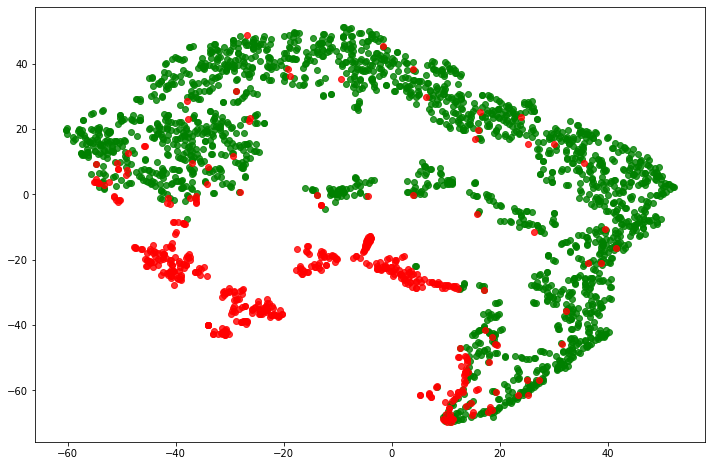

In [20]:
anomaly_entries = df[df['Class'] == 1]
regular_entries = df[df['Class'] == 0]
subsample_size = 2000
regular_sample = regular_entries.sample(n=subsample_size)
dataset_subsample = anomaly_entries.append(regular_sample)
X_subsample = dataset_subsample.drop(columns=['Class']).values
y_subsample = dataset_subsample['Class'].values
tsne_plot(X_subsample, y_subsample)

/var/folders/jq/1l3r6pcn17lglysrw1rgw3yc0000gn/T/ipykernel_33958/1149759380.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_subsample = anomaly_entries.append(regular_sample)
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


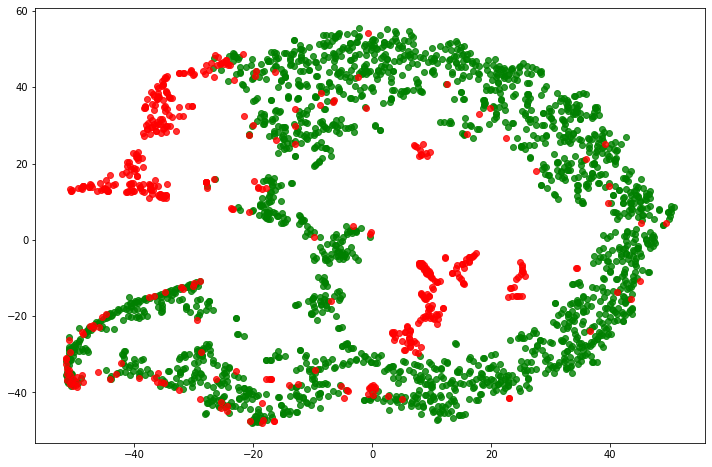

In [71]:
anomaly_entries = df[df['Class'] == 1]
regular_entries = df[df['Class'] == 0]
subsample_size = 2000
regular_sample = regular_entries.sample(n=subsample_size)
dataset_subsample = anomaly_entries.append(regular_sample)
X_subsample = dataset_subsample.drop(columns=['Class']).values
y_subsample = dataset_subsample['Class'].values
tsne_plot(X_subsample, y_subsample)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Class
0,0.0,2.031799,0.028990,1.851513,2.013241,4.380721,0.00000,0.460019,2.545230,4.451500,...,0.316681,2.134819,0.000000,0.0,0.702580,0.0,3.868605,2.952289,1.916784,0
1,0.0,0.543713,0.292494,0.419468,0.811626,1.262709,0.00000,0.336967,1.172161,0.609434,...,0.000000,0.442298,0.000000,0.0,0.000000,0.0,1.487720,1.052475,1.080615,0
2,0.0,2.210564,0.000000,1.777172,2.130795,4.279499,0.00000,0.566729,2.444287,4.322381,...,0.314490,2.095310,0.000000,0.0,0.792257,0.0,3.780650,3.097649,1.737687,0
3,0.0,2.336591,0.120785,1.829079,1.779768,4.229074,0.00000,0.435568,2.658762,4.345755,...,0.292385,2.383136,0.000000,0.0,0.855358,0.0,4.044794,3.297369,1.921683,0
4,0.0,2.101726,0.000000,1.783733,2.096034,4.202409,0.00000,0.560074,2.456677,4.331202,...,0.294445,2.085203,0.000000,0.0,0.819383,0.0,3.765597,3.058803,1.791944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.0,0.000000,0.565471,0.644366,0.000000,0.000000,0.00000,0.000000,0.710096,0.000000,...,1.031519,0.000000,1.389884,0.0,1.740254,0.0,0.000000,0.000000,0.000000,0
284803,0.0,0.703444,0.460044,1.399275,0.000000,1.154530,0.00000,0.000000,2.533894,2.609794,...,0.130868,0.778537,0.000000,0.0,0.537589,0.0,1.059839,0.825624,1.380553,0
284804,0.0,1.419315,0.351231,1.413867,1.198076,4.509110,0.00000,0.000000,3.111576,4.380589,...,0.024676,2.278180,0.000000,0.0,0.906852,0.0,3.463619,2.633456,1.833524,0
284805,0.0,0.031197,1.073001,1.289148,0.000000,0.000000,1.07771,0.000000,1.850528,1.189025,...,0.000000,0.000000,0.240994,0.0,0.867998,0.0,0.000000,0.000000,1.237028,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_all,
test_size=0.2, shuffle=True, stratify = y_all)

In [23]:
X_train.shape

(227845, 50)

In [24]:
X_test.shape

(56962, 50)

In [25]:
y_train.shape

(227845,)

In [26]:
y_test.shape

(56962,)

In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
clf = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, y_train)

In [29]:
predict = clf.predict(X_test)

In [32]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

print(accuracy_score(y_test, predict))
print(precision_score(y_test, predict,  average='macro', zero_division=1))
print(recall_score(y_test, predict, average='weighted'))
print(f1_score (y_test, predict,  average='weighted'))

0.9989817773252344
0.9281321075859437
0.9989817773252344
0.9988431167252005


## Вторая часть

In [38]:
from sklearn.neighbors import LocalOutlierFactor

In [39]:
local_outlier_factor = LocalOutlierFactor(n_neighbors=20, leaf_size=30, metric='minkowski', p=2)

In [40]:
 y_lof = local_outlier_factor.fit_predict(X) == -1

In [42]:
print(accuracy_score(X, y_lof))
print(precision_score(X, y_lof,  average='macro', zero_division=1))
print(recall_score(X, y_lof, average='weighted'))
print(f1_score (X, y_lof,  average='weighted'))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets